In [21]:
#standard imports nothing spectacular
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
#all this is for the modeling 
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from scipy import stats
#this one does all the work
import wrangler

#this box is always a mess for me I usually throw it all in to just make sure it runs no issue 
from sklearn.metrics import mean_squared_error
from math import sqrt

from pandas.plotting import register_matplotlib_converters

from statsmodels.tsa.api import Holt

# Individual Project

---
****
# Executive Summary
## Goals:

# The purpose of this project is utilize a database of Airbnb Properties to construct a model that can predict their price. 
The datasource includes the Listing.csv from Kagle. Can that model be beaten and give us a business advantage?

Goal : Build a model using only the features of the property to predict listing price. 

# Question asked
## Is Listing Price related to number of bedrooms
## Is Listing Price related to number of ammenities
## Is Listing Price related to location of listing


## Key Findings:

While location City of the property does impact price it really is a variable that had to be dropped in order to make a better model.


Bedroom count is related to the price of a Airbnb but there are other factors that were not included in this analysis such as location, time of year, and quality of bedroom. That is because there was not time of year data present with prices and the this created numerous outliers one example is a room in Brasil was going for $625,615
so there was likely a currency issue along a timing issue with this one bedroom shared which was listed for over $600k.

Number of Ammenities is related to the price of an Airbnb but there is no real quality control over this feature, so a lister could list everything in their Airbnb and make the total number of their Airbnb skew the data. 

## Takeaway:

More rooms and More listed Ammenities does allow for increased price of Airbnb, if listing an Airbnb it would be more profitable to have a lot of rooms and a list everything in the property. 

## Recommendation:

Get more information such as time of year data, quality, property tax value, and possibly begin to jump in to looking at rating and how ratings correlates to all the factors give.  

***
---

# Acquire:
***
---

In [18]:
#here we had to download the csv before we created aquire becasue the size required it be a zip file and it was easy to aquire with out it being a zip
df=wrangler.get_airbnb_data()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279539 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

### Data Used

| Target | Definition | Data Type |
| ----- | ----- | ----- |
|price|	Listing price (in each country's currency)|int64|
***
---
***
| Attribute | Definition | Data Type |
| ----- | ----- | ----- |
|listing_id|	Listing ID|int64|
|name|	Listing Name|object|
|host_id|	Host ID|int64|
|host_since|	Date the Host joined Airbnb|object|
|host_location|	Location where the Host is based|object|
|host_response_time|	Estimate of how long the Host takes to respond|object|
|host_response_rate|	Percentage of times the Host responds|float64|
|host_acceptance_rate|	Percentage of times the Host accepts a booking request|float64|
|host_is_superhost|	Binary field to determine if the Host is a Superhost|object|
|host_total_listings_count|	Total listings the Host has in Airbnb|object|
|host_has_profile_pic|	Binary field to determine if the Host has a profile picture|object|
|host_identity_verified|Binary field to determine if the Host has a verified identity|object|
|neighbourhood|	Neighborhood the Listing is in|object|
|district|	District the Listing is in|object|
|city|	City the Listing is in|object|
|latitude|	Listing's latitude|float64|
|longitude|	Listing's longitude|float64|
|property_type|	Type of property for the Listing|object|
|room_type|	Type of room type in Airbnb for the Listing|object|
|accommodates|	Guests the Listing accomodates|int64|
|bedrooms|	Bedrooms in the Listing|float64|
|amenities|	Amenities the Listing includes|object|
|price|	Listing price (in each country's currency)|int64|
|minimum_nights|	Minimum nights per booking|int64|
|maximum_nights|	Maximum nights per booking|int64|
|review_scores_rating|	Listing's overall rating (out of 100)|float64|
|review_scores_accuracy|	Listing's accuracy score based on what's promoted in Airbnb (out of 10)|float64|
|review_scores_cleanliness|	Listing's cleanliness score (out of 10)|float64|
|review_scores_checkin|	Listing's check-in experience score (out of 10)|float64|
|review_scores_communication|	Listing's communication with the Host score (out of 10)|float64|
|review_scores_location|	Listing's location score within the city (out of 10)|float64|
|review_scores_value|	Listing's value score relative to its price (out of 10)|float64|
|instant_bookable|	Binary field to determine if the Listing can be booked instantly|object|
|total_amenities|  Sum of Amenities after transformed to dummies|int64|
***

# Prepare:
***
---

In [5]:
#this data was a mess so we dropped a lot of columns created one and dropped nulls
df=wrangler.wrangle_data(df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218475 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   listing_id       218475 non-null  int64  
 1   city             218475 non-null  object 
 2   bedrooms         218475 non-null  float64
 3   price            218475 non-null  int64  
 4   total_amenities  218475 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 10.0+ MB


In [7]:
train, validate, test=wrangler.split_data(df)

# Explore:
***
---

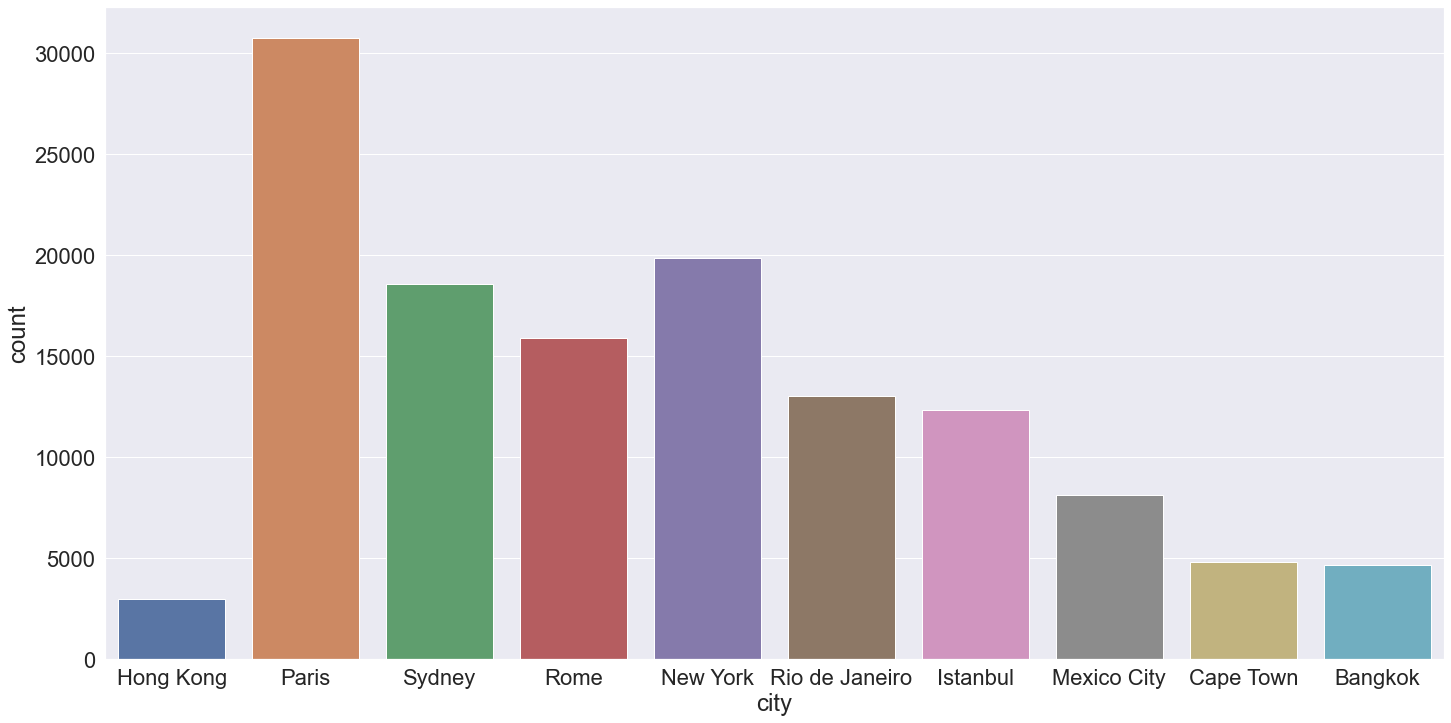

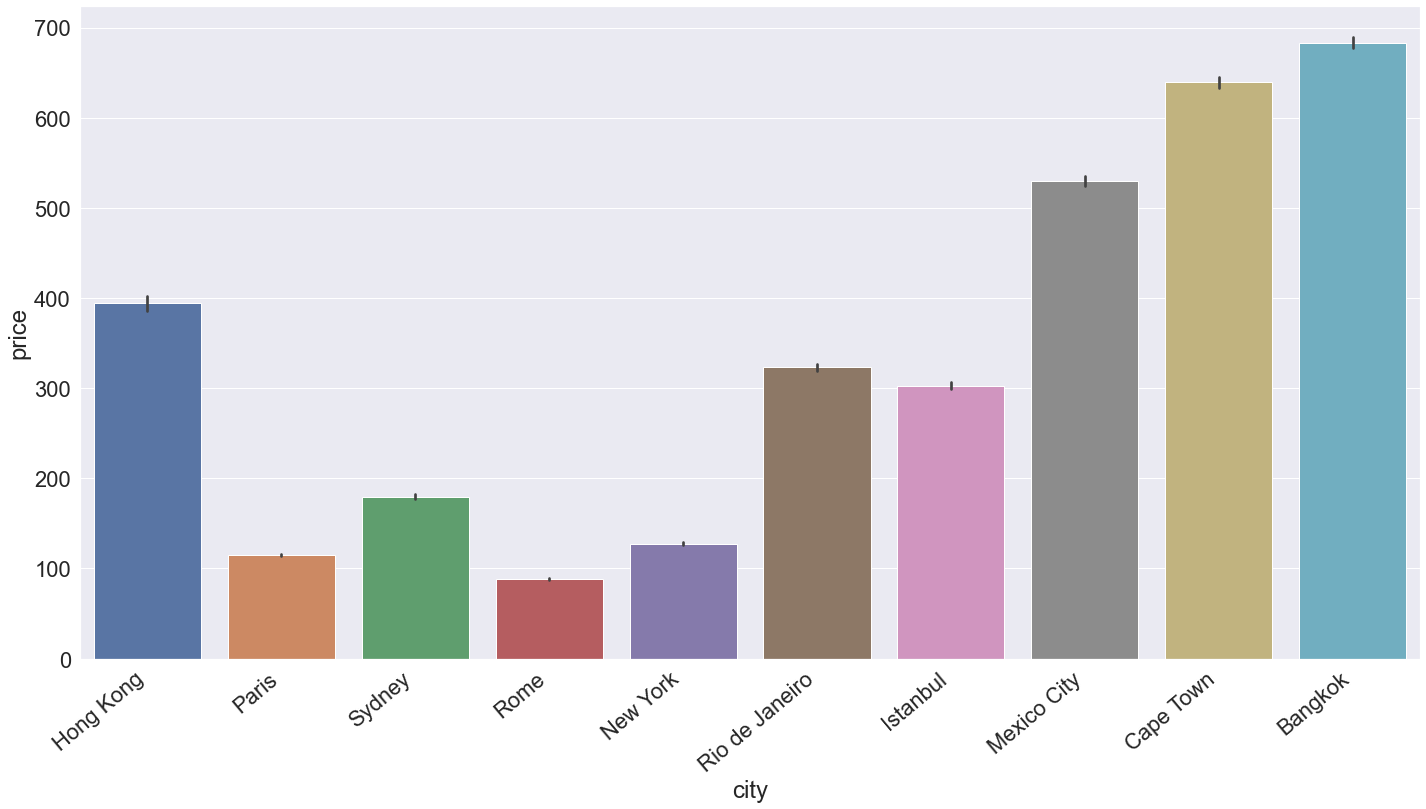

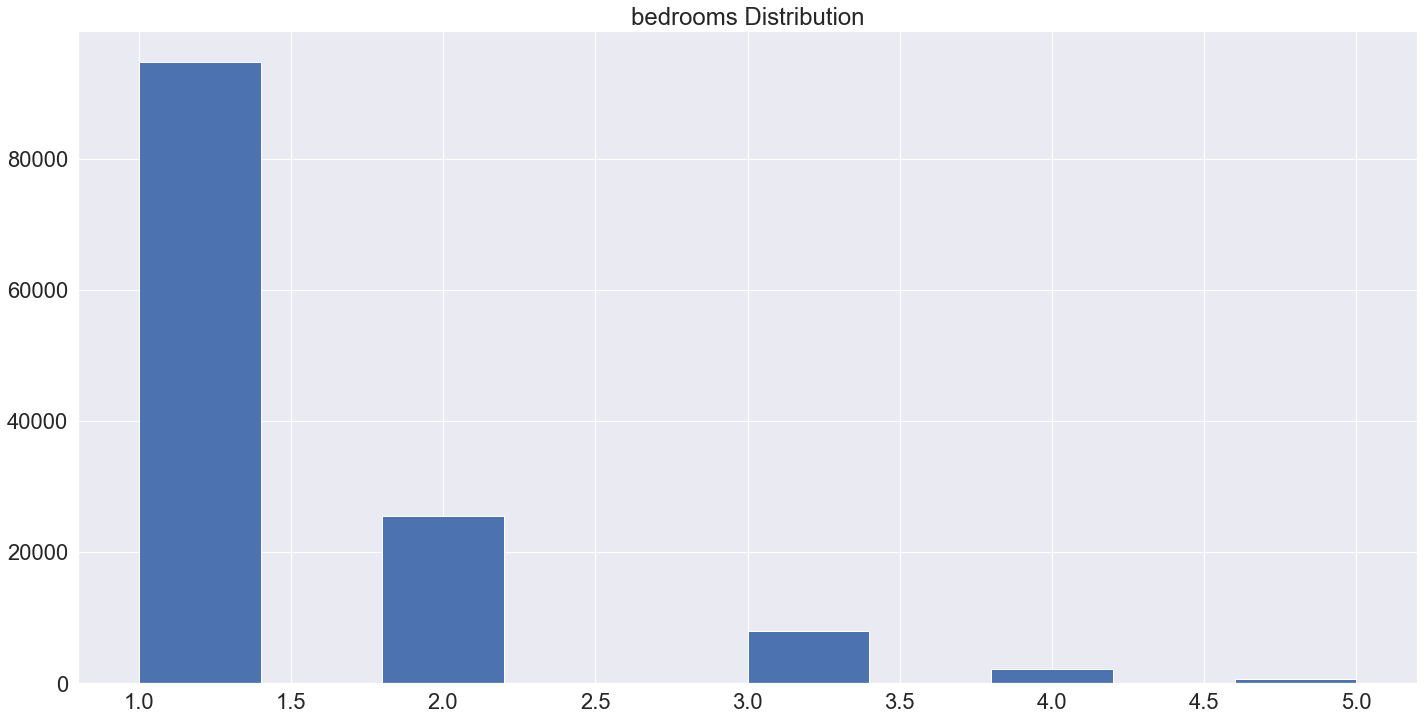

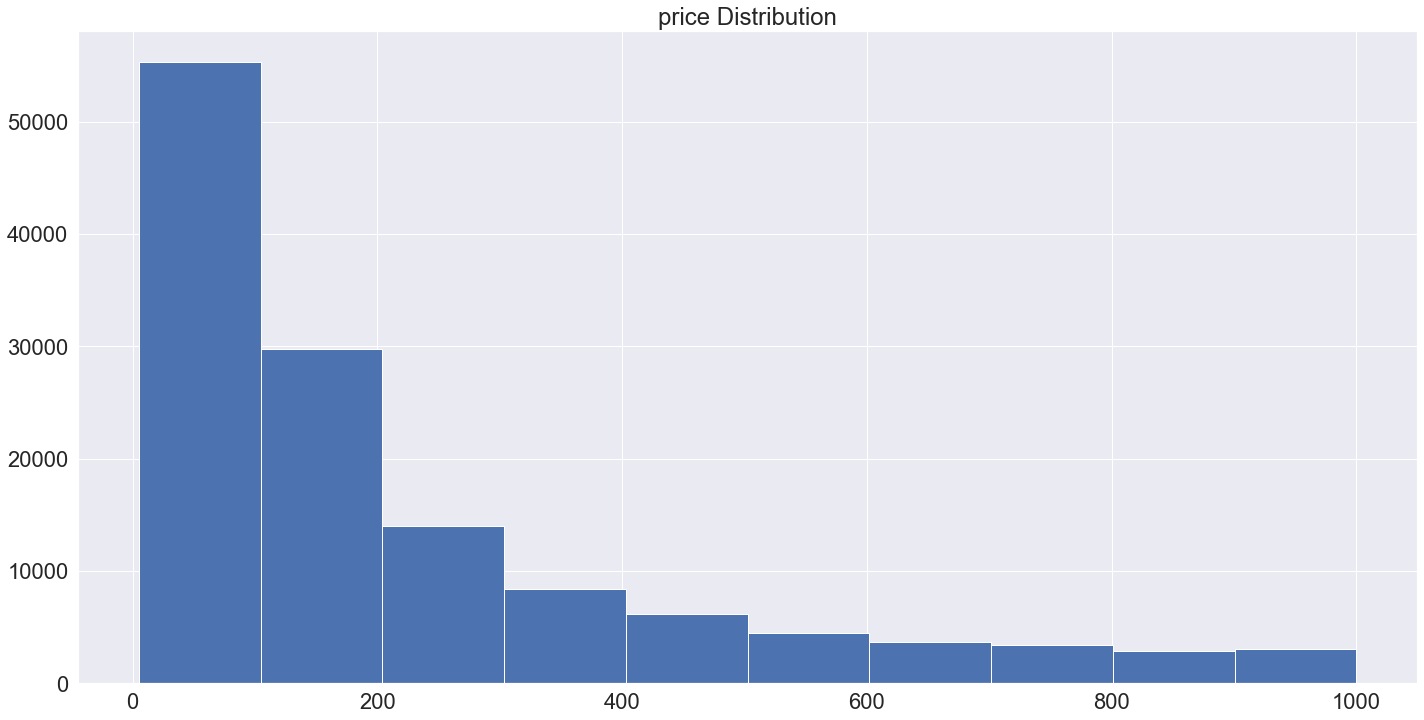

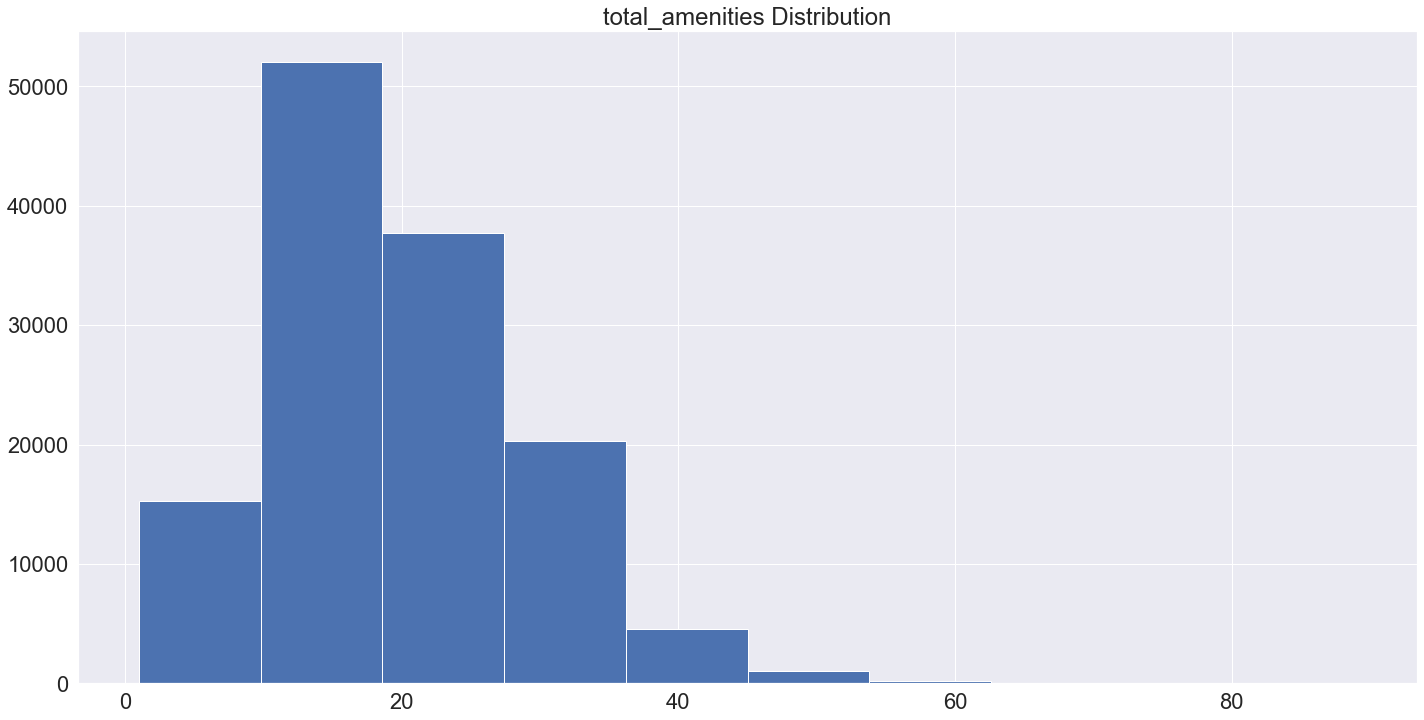

In [8]:
wrangler.vis_data(train)

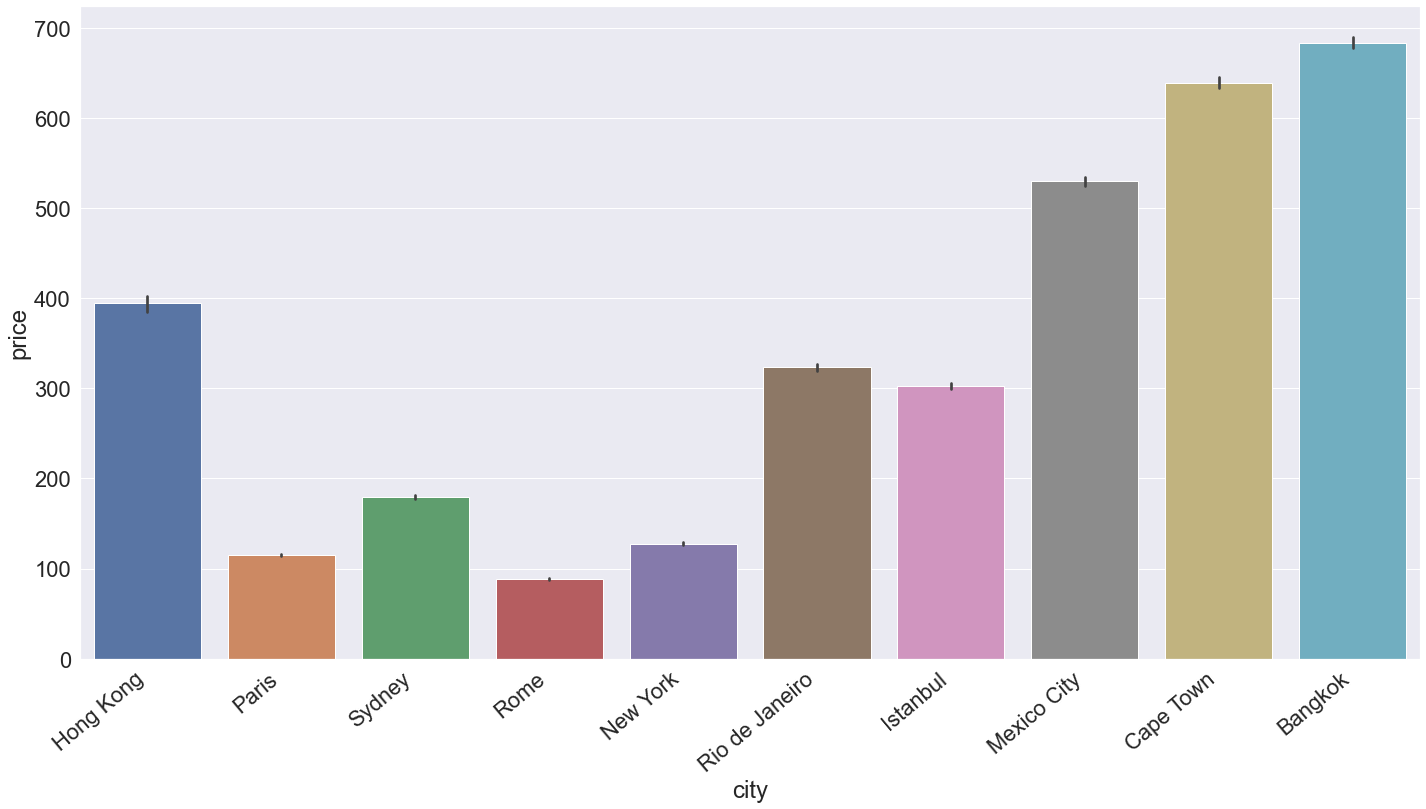

In [9]:
wrangler.vis_price_city(train)
#here we show why we had to drop city from our model and evaluation. 

# I had to drop Location because there is no way for me to be able to evealuate which location is better because of the number of listings from each city and the disperity in price

---
***
# Modeling
***
----

# Hypothesis 

## alpha = .05

## Pearson R test

## $H_0$: Price is independent of the Number of Bedrooms of a listing has

## $H_a$ : Price is dependent of Number of Bedrooms of a listing has

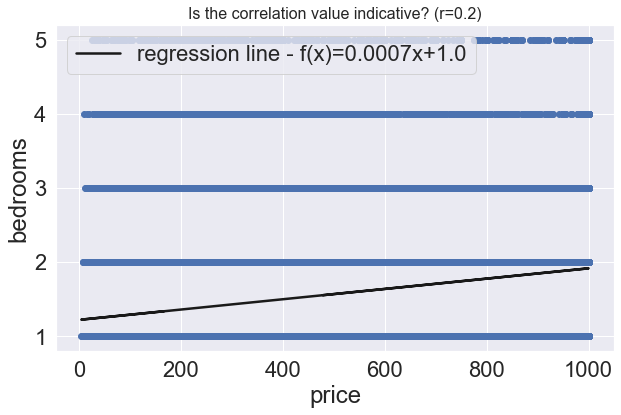

r = 0.22798021093285986

 We reject the null Hypothesis ( T̶h̶a̶t̶ ̶t̶h̶e̶ ̶d̶i̶s̶t̶r̶i̶b̶u̶t̶i̶o̶n̶s̶ ̶u̶n̶d̶e̶r̶l̶y̶i̶n̶g̶ ̶t̶h̶e̶ ̶s̶a̶m̶p̶l̶e̶s̶ ̶o̶f̶ ̶p̶r̶i̶c̶e̶ ̶a̶n̶d̶ ̶b̶e̶d̶r̶o̶o̶m̶s̶ ̶a̶r̶e̶ ̶u̶n̶r̶e̶l̶a̶t̶e̶d̶ ) p=0.00000


In [14]:
wrangler.pearsonr_corr_explore_plot(train,'price','bedrooms')

# Hypothesis 

## alpha = .05

## Pearson R test

## $H_0$: Price is independent of the Number of Ammenities of a listing has

## $H_a$ : Price is dependent of Number of Ammenities of a listing has

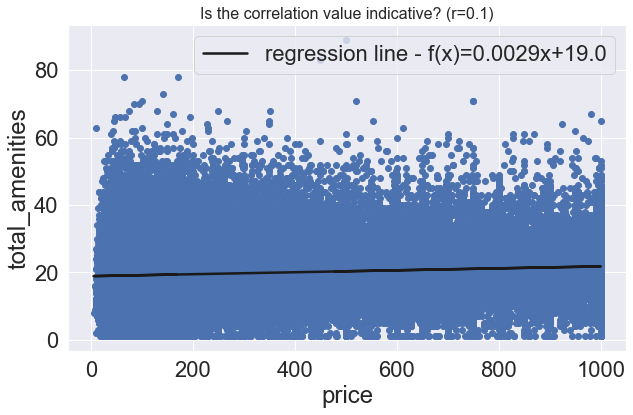

r = 0.07483740580548405

 We reject the null Hypothesis ( T̶h̶a̶t̶ ̶t̶h̶e̶ ̶d̶i̶s̶t̶r̶i̶b̶u̶t̶i̶o̶n̶s̶ ̶u̶n̶d̶e̶r̶l̶y̶i̶n̶g̶ ̶t̶h̶e̶ ̶s̶a̶m̶p̶l̶e̶s̶ ̶o̶f̶ ̶p̶r̶i̶c̶e̶ ̶a̶n̶d̶ ̶t̶o̶t̶a̶l̶_̶a̶m̶e̶n̶i̶t̶i̶e̶s̶ ̶a̶r̶e̶ ̶u̶n̶r̶e̶l̶a̶t̶e̶d̶ ) p=0.00000


In [15]:
wrangler.pearsonr_corr_explore_plot(train,'price','total_amenities')

In [10]:
cols = ['bedrooms', 'total_amenities']
X_train = train[cols]
y_train = train['price']
X_validate = validate[cols]
y_validate = validate['price']
X_test = test[cols]
y_test = test['price']
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_test=pd.DataFrame(y_test)

In [12]:
wrangler.baseline_RMSE(y_train, y_validate)

RMSE using Mean
Train/In-Sample:  235.4 
Validate/Out-of-Sample:  237.29


In [13]:
wrangler.eval_models(y_train, y_validate, X_train, X_validate, X_test)

RMSE for Lasso + Lars
Training/In-Sample:  235.4 
Validation/Out-of-Sample:  237.29
R2 Value: 0.0
-----------------------------------------------
RMSE for OLS using LinearRegression
Training/In-Sample:  229.0 
Validation/Out-of-Sample:  230.77
R2 Value: 0.05
-----------------------------------------------
RMSE for Polynomial Model, degrees=2
Training/In-Sample:  228.95 
Validation/Out-of-Sample:  230.79
R2 Value: 0.05


---
***
# Best Model was Lasso +Lars 
***
---

In [17]:
wrangler.test_laso(X_test,y_test)

RMSE for Lasso + Lars
Test/In-Sample:  236.706649483469


---
***
# Conclusion:
While location City of the property does impact price it really is a variable that had to be dropped in order to make a better model.


Bedroom count is related to the price of a Airbnb but there are other factors that were not included in this analysis such as location, time of year, and quality of bedroom. That is because there was not time of year data present with prices and the this created numerous outliers one example is a room in Brasil was going for $625,615.

So there was likely a currency issue along a timing issue with this one bedroom shared which was listed for over $600k.

Number of Ammenities is related to the price of an Airbnb but there is no real quality control over this feature, so a lister could list everything in their Airbnb and make the total number of their Airbnb skew the data. 

## Takeaway:

More rooms and More listed Ammenities does allow for increased price of Airbnb, if listing an Airbnb it would be more profitable to have a lot of rooms and a list everything in the property. 

## Recommendation:

Get more information such as time of year data, quality, property tax value, and possibly begin to jump in to looking at rating and how ratings correlates to all the factors give.  

### Next steps are to refine functions clean up notebook and then run test on other features. 
***
---

## To reproduce these fantastic results you will need to download the kagle zip for the 'Listing.csv' from https://www.kaggle.com/datasets/mysarahmadbhat/airbnb-listings-reviews
## and also download my wrangler.py 
